<a href="https://colab.research.google.com/github/MuhammedAshraf2020/Face-Recognition-using-Deep-Face/blob/main/Face_Recognition_Using_Deep_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Import DataSet `**

In [99]:
import pandas as pd

In [101]:
df = pd.read_csv("face_data.csv")

In [160]:
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
102,0.326446,0.144628,0.260331,0.752066,0.847107,0.851240,0.847107,0.847107,0.851240,0.842975,0.842975,0.838843,0.830578,0.826446,0.826446,0.822314,0.809917,0.805785,0.805785,0.793388,0.797521,0.793388,0.793388,0.772727,0.764463,0.768595,0.752066,0.747934,0.735537,0.739669,0.743802,0.752066,0.760331,0.764463,0.760331,0.764463,0.768595,0.785124,0.772727,0.739669,...,0.495868,0.454545,0.396694,0.438017,0.322314,0.334711,0.309917,0.260331,0.280992,0.309917,0.351240,0.355372,0.376033,0.425620,0.458678,0.471074,0.487603,0.508265,0.574380,0.545455,0.570248,0.553719,0.433884,0.342975,0.334711,0.384298,0.392562,0.367769,0.355372,0.384298,0.376033,0.334711,0.243802,0.210744,0.157025,0.181818,0.140496,0.301653,0.157025,10.0
103,0.169422,0.570248,0.871901,0.855372,0.863636,0.863636,0.863636,0.855372,0.834711,0.834711,0.830578,0.822314,0.814050,0.809917,0.814050,0.809917,0.809917,0.818182,0.818182,0.826446,0.822314,0.826446,0.818182,0.814050,0.809917,0.826446,0.814050,0.818182,0.818182,0.818182,0.809917,0.801653,0.809917,0.814050,0.801653,0.789256,0.785124,0.809917,0.785124,0.752066,...,0.528926,0.487603,0.454545,0.392562,0.404959,0.338843,0.309917,0.289256,0.260331,0.264463,0.293388,0.326446,0.351240,0.363636,0.421488,0.454545,0.462810,0.479339,0.528926,0.557851,0.566116,0.566116,0.487603,0.384298,0.334711,0.363636,0.409091,0.421488,0.363636,0.384298,0.384298,0.334711,0.243802,0.161157,0.165289,0.148760,0.107438,0.103306,0.107438,10.0
104,0.342975,0.326446,0.392562,0.566116,0.719008,0.785124,0.822314,0.838843,0.838843,0.838843,0.822314,0.826446,0.814050,0.805785,0.793388,0.785124,0.772727,0.768595,0.764463,0.756198,0.752066,0.747934,0.735537,0.731405,0.723140,0.714876,0.706612,0.714876,0.710744,0.698347,0.698347,0.723140,0.719008,0.735537,0.739669,0.714876,0.694215,0.706612,0.698347,0.685950,...,0.557851,0.508265,0.487603,0.388430,0.392562,0.371901,0.367769,0.380165,0.400826,0.446281,0.442149,0.479339,0.491736,0.520661,0.541322,0.578512,0.595041,0.599174,0.599174,0.599174,0.574380,0.603306,0.549587,0.466942,0.491736,0.425620,0.524793,0.483471,0.466942,0.466942,0.376033,0.392562,0.355372,0.264463,0.194215,0.144628,0.111570,0.119835,0.119835,10.0
105,0.185950,0.297521,0.665289,0.838843,0.855372,0.859504,0.855372,0.855372,0.847107,0.838843,0.838843,0.830578,0.830578,0.834711,0.830578,0.822314,0.801653,0.814050,0.805785,0.797521,0.793388,0.793388,0.789256,0.768595,0.772727,0.764463,0.747934,0.752066,0.739669,0.747934,0.752066,0.768595,0.764463,0.776860,0.768595,0.768595,0.793388,0.785124,0.747934,0.727273,...,0.528926,0.454545,0.458678,0.458678,0.359504,0.280992,0.252066,0.239669,0.314050,0.243802,0.355372,0.371901,0.479339,0.479339,0.528926,0.528926,0.516529,0.483471,0.471074,0.512397,0.487603,0.409091,0.330578,0.392562,0.363636,0.338843,0.318182,0.342975,0.351240,0.380165,0.301653,0.235537,0.198347,0.165289,0.148760,0.185950,0.231405,0.152893,0.099174,10.0
106,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830578,0.826446,0.822314,0.814050,0.809917,0.805785,0.801653,0.797521,0.793388,0.793388,0.789256,0.793388,0.789256,0.793388,0.789256,0.789256,0.789256,0.793388,0.780992,0.776860,0.747934,0.727273,0.727273,0.710744,0.714876,0.710744,0.710744,0.714876,0.719008,0.714876,0.719008,0.702479,0.723140,0.723140,...,0.516529,0.528926,0.483471,0.429752,0.454545,0.322314,0.264463,0.285124,0.214876,0.309917,0.272727,0.396694,0.433884,0.487603,0.479339,0.512397,0.462810,0.508265,0.500000,0.462810,0.417355,0.347107,0.326446,0.351240,0.322314,0.289256,0.305785,0.301653,0.293388,0.330578,0.264463,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835,10.0
107,0.528926,0.797521,0.826446,0.822314,0.822314,0.818182,0.805

In [ ]:
df = df.drop(122 , axis = 0)

In [166]:
df.isna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [138]:
X = df.drop("target" , axis = 1)

In [139]:
y = df["target"]

In [140]:
X = np.array(X)
y = np.array(y)

In [146]:
Image1 = X[10].reshape((64 , 64))

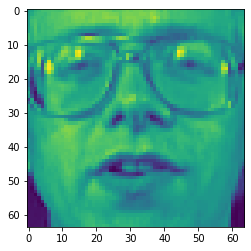

In [147]:
plt.imshow(Image1)

In [190]:
X = X.reshape((X.shape[0] , 64 , 64 , 1))

In [191]:
X.shape

(122, 64, 64, 1)

In [181]:
indeces = [6 , 16 , 26 , 36 , 46 , 56 , 66 , 76 , 86 , 96 , 106 , 116]

In [182]:
indeces

[6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116]

In [212]:
X_train = []
X_test  = []
y_train = []
y_test  = []
for index in range(len(X)):
  if index in indeces:
    y_test.append(y[index])
    X_test.append(X[index])
  else:
    X_train.append(X[index])
    y_train.append(y[index])


In [193]:
len(X_train) , len(y_train)

(110, 110)

In [213]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

In [195]:
y_test

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [196]:
X_train.shape

(110, 64, 64, 1)

**Prepare DataSet**

**bUILD MODEL**

In [32]:
import tensorflow
from tensorflow.keras import layers, models

In [198]:
Model = models.Sequential([
      
      layers.Conv2D(32 , (3 , 3) , activation = "relu" , input_shape = ( 64, 64 , 1)) ,
      layers.MaxPool2D((2 , 2)) ,
      layers.Conv2D(64 , (3 , 3) , activation = "relu") ,
      layers.MaxPool2D((2 , 2)) ,
      layers.Flatten() , 
])

In [199]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [218]:
PredsTrain = Model.predict(X_train)

In [202]:
Preds.shape

(110, 12544)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [219]:
knn_model = KNN(n_neighbors = 1)
knn_model.fit(PredsTrain , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [221]:
PredsTest = Model.predict(X_test)

In [222]:
S = knn_model.predict(PredsTest)

In [223]:
S

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])